# Boids

## Pre-commit checklist

- [ ] Restart kernel and run all cells
- [ ] Clear all output and save the notebook
- [ ] Run `!nbqa flake8 boids.ipynb`

1. first item
1. second item
3. third item

In [1]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from matplotlib import pyplot as plt

!nbqa flake8 boids.ipynb
print("hello world")

hello world


In [2]:
def generate_boid_attributes(lower, upper, n=10):
    width = upper - lower
    attributes = np.random.random_sample(size=(2, n)) * width[:, np.newaxis]
    attributes += lower[:, np.newaxis]
    return attributes


expected = (2, 10)
actual = generate_boid_attributes(np.array([0, 0]), np.array([1, 1])).shape
assert expected == actual

In [3]:
lower_p = np.array([150, 300])  # x-lower, y-lower
upper_p = np.array([200, 400])  # x-upper, y-upp

positions = generate_boid_attributes(lower_p, upper_p)
positions

array([[186.42911032, 196.67046739, 187.06447059, 175.8050211 ,
        165.67424634, 163.59988313, 153.14722704, 167.64076347,
        164.13944738, 186.2368808 ],
       [376.30267491, 303.23430286, 377.5680729 , 305.50119147,
        340.94573307, 379.01592102, 381.00138019, 300.84887981,
        330.30100311, 341.91029594]])

In [4]:
lower_v = np.array([5, -10])  # x-lower, y-lower
upper_v = np.array([15, 5])  # x-upper, y-upp

velocities = generate_boid_attributes(lower_v, upper_v)
velocities

array([[ 7.02081384, 11.53823754, 14.03056438,  8.42718422,  9.71535028,
         9.85693046,  7.20483521,  6.08872487,  5.58465373,  7.4864992 ],
       [-4.97860808,  0.98466241, -1.23521003, -0.52655071, -2.03943677,
        -6.3972161 ,  3.70511557, -6.0595248 , -7.87109116, -2.40042754]])

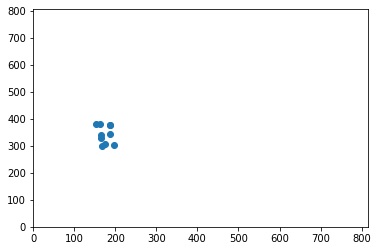

In [5]:
plt.xlim(0, 4 * upper_p[0] + upper_v[0])
plt.ylim(0, 2 * upper_p[1] + upper_v[1])

scatter = plt.scatter(positions[0, :], positions[1:])

In [6]:
def update_boids(positions, velocities):
    """Updates the boid positions."""
    positions += velocities


def animate(frame):
    """Updates the scatter plot."""
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [7]:


anim = animation.FuncAnimation(scatter.figure, animate, frames=50, interval=50)

HTML(anim.to_jshtml())